In [1]:
import scanreader

In [2]:
scan = scanreader.read_scan("/Users/stephenholtz/local_data/a2_transcuticular_somata_20180315T160900/session_001/position_steps_20180313/stimulus_001/images_001.tif")
print(scan.shape)

ms_per_frame = 1000/scan.fps
print('ms per frame: ' + str(ms_per_frame))

(1, 256, 256, 2, 24)
ms per frame: 186.140707483601


In [3]:
stack = scan[:,:,:,0].squeeze()

frame = stack[:,:,0]
print(frame.shape)

(256, 256)


In [4]:
import matplotlib.pyplot as plt
import numpy as np

#### (normalized) max projection

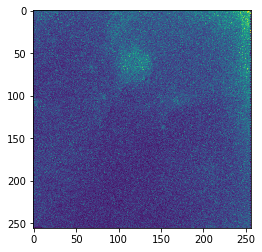

In [8]:
plt.imshow(np.max(stack,axis=2)/np.max(stack));

#### Animate a timeseries from scanimage
Examples http://tiao.io/posts/notebooks/embedding-matplotlib-animations-in-jupyter-notebooks/

https://stackoverflow.com/questions/23176161/animating-pngs-in-matplotlib-using-artistanimation

In [9]:
from matplotlib import rc, animation
import matplotlib.image as mplimg
from IPython.display import HTML

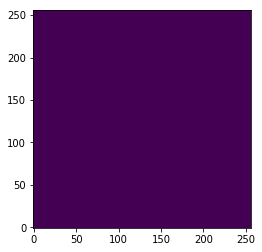

In [50]:
fig = plt.figure()
ax = plt.gca()

# Blank AxesImage object
imobj = ax.imshow( np.zeros((np.size(stack,axis=0), np.size(stack,axis=1))), origin='lower', alpha=1.0, zorder=1, aspect=1 );

# Set stack to the first frame
def init_stack():
    imobj.set_data(stack[-1::-1,:,0])
    
    return  imobj,

# Iterate through the stack
def animate_stack(i):
    img = stack[-1::-1,:,i]
    imobj.set_data(img)
    # Probably a better way to use this...
    imobj.autoscale()

    return  imobj,

In [52]:
anim = animation.FuncAnimation(fig, animate_stack, init_func=init_stack, repeat = True,
                               frames=np.size(stack,axis=2), interval=ms_per_frame, blit=True, repeat_delay=1000)
HTML(anim.to_html5_video())